# Corona Virus Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
sbn.set(rc={'figure.figsize':(11.7,8.27)})


In [2]:
rawData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
dataFrames = dict(states={}, counties={})
columns = ['cases', 'deaths']

def getTotal(): 
    if not "total" in dataFrames:
        dataFrames["total"] =rawData.groupby('date').sum()[columns]
    return dataFrames["total"]

def getState(state):
    if not state in dataFrames["states"]:
        statedf = rawData[rawData.state==state].groupby('date').sum()[columns]
        if statedf.empty:
            print (state + " is not in the data, did you spell it right? capitalization?")
            return 
        else:
            dataFrames["states"][state] = statedf
    return dataFrames["states"][state]

def getCounty(county):
    if not county in dataFrames["counties"]:
        countydf = rawData[rawData.county==county].groupby('date').sum()[columns]
        if countydf.empty:
            print(county + " is not in the data, did you spell it right? capitalization?")
            return
        else:
            dataFrames["counties"][county] = countydf
    return dataFrames["counties"][county]
        

In [4]:
yesterday, today = getTotal().tail(2).index.values # last two dates data to check how recent this data is
print("Latest date: ", today)

Latest date:  2020-04-12


In [5]:

yesterdayLatest = rawData[rawData.date == yesterday].groupby(['state', 'county']).sum()[columns]
latest = rawData[rawData.date == today].groupby(['state', 'county']).sum()[columns]
deltas = latest - yesterdayLatest
latest["newcases"] = deltas.cases
latest["newdeaths"] = deltas.deaths
latest = latest.reset_index()

In [6]:
print("Counties with the most new cases:", today)
latest.sort_values('newcases', ascending=False)[:30]

Counties with the most new cases: 2020-04-12


state         county   cases  deaths  newcases  newdeaths
1589       New York  New York City  103208    6717    4900.0      515.0
564        Illinois           Cook   14585     485    1168.0       32.0
1588       New York         Nassau   23553    1030     969.0       65.0
1608       New York        Suffolk   20816     529     933.0       60.0
1094  Massachusetts      Middlesex    5660     149     788.0       12.0
1521     New Jersey         Hudson    7469     226     618.0       43.0
1616       New York    Westchester   19313     562     584.0       57.0
1098  Massachusetts        Suffolk    5359      81     433.0        7.0
1514     New Jersey         Bergen    9784     453     422.0       18.0
1519     New Jersey          Essex    7410     428     403.0       16.0
1533     New Jersey        Unknown    1274       2     350.0        0.0
1969   Pennsylvania   Philadelphia    6352     128     330.0       -2.0
182      California    Los Angeles    9192     296     319.0       31.0
1991   Rhode Island        Unknown     989      43     316.0        7.0
1532     New Jersey          Union    6180     209     315.0       14.0
330         Florida     Miami-Dade    7057      97     300.0        4.0
1528     New Jersey        Passaic    5590     131     295.0       12.0
1524     New Jersey      Middlesex    5693     193     287.0       16.0
1090  Massachusetts          Essex    3170     101     274.0       10.0
1096  Massachusetts        Norfolk    2649      91     254.0       12.0
1600       New York       Rockland    7721     166     244.0       13.0
279     Connecticut      New Haven    2946     119     231.0       12.0
1097  Massachusetts       Plymouth    2024      61     215.0        4.0
1175       Michigan          Wayne   11164     704     213.0       52.0
1100  Massachusetts      Worcester    2032      48     210.0        7.0
194      California      Riverside    1619      41     188.0        0.0
1594       New York         Orange    5027     112     180.0       13.0
1526     New Jersey         Morris    3099     162     174.0       10.0
2524     Washington           King    4428     294     164.0        8.0
1527     New Jersey          Ocean    3554     138     151.0        6.0

In [7]:
print("Counties with the most new cases in California:", today)
latest[latest.state=="California"].sort_values('newcases', ascending=False)[:10]

Counties with the most new cases in California: 2020-04-12


state          county  cases  deaths  newcases  newdeaths
182  California     Los Angeles   9192     296     319.0       31.0
194  California       Riverside   1619      41     188.0        0.0
197  California  San Bernardino    887      31      77.0        6.0
191  California          Orange   1277      19      56.0        1.0
204  California     Santa Clara   1621      54      55.0        2.0
198  California       San Diego   1804      45      43.0        0.0
165  California         Alameda    864      23      37.0        2.0
179  California            Kern    396       3      27.0        0.0
199  California   San Francisco    875      14      15.0        1.0
200  California     San Joaquin    273      16      13.0        1.0

In [8]:
print("Counties with the most new cases in Colorado:", today)
latest[latest.state=="Colorado"].sort_values('newcases', ascending=False)[:10]

Counties with the most new cases in Colorado: 2020-04-12


state     county  cases  deaths  newcases  newdeaths
220  Colorado   Arapahoe   1083      38      85.0        1.0
231  Colorado     Denver   1247      46      65.0        0.0
273  Colorado       Weld    738      48      55.0        4.0
218  Colorado      Adams    647      26      54.0        1.0
243  Colorado  Jefferson    763      29      50.0        4.0
234  Colorado    El Paso    613      37      35.0        2.0
233  Colorado      Eagle    452       5      19.0        0.0
223  Colorado    Boulder    264      11      18.0        3.0
247  Colorado    Larimer    187       9       7.0        0.0
255  Colorado   Montrose     57       4       7.0        0.0

In [9]:
print("Counties with the most new deaths:", today)
latest.sort_values('newdeaths', ascending=False)[:30]

Counties with the most new deaths: 2020-04-12


state         county   cases  deaths  newcases  newdeaths
1589       New York  New York City  103208    6717    4900.0      515.0
1588       New York         Nassau   23553    1030     969.0       65.0
1608       New York        Suffolk   20816     529     933.0       60.0
1616       New York    Westchester   19313     562     584.0       57.0
1175       Michigan          Wayne   11164     704     213.0       52.0
1521     New Jersey         Hudson    7469     226     618.0       43.0
564        Illinois           Cook   14585     485    1168.0       32.0
182      California    Los Angeles    9192     296     319.0       31.0
275     Connecticut      Fairfield    5534     248     127.0       28.0
1514     New Jersey         Bergen    9784     453     422.0       18.0
1519     New Jersey          Essex    7410     428     403.0       16.0
1524     New Jersey      Middlesex    5693     193     287.0       16.0
276     Connecticut       Hartford    1914     116      82.0       15.0
1532     New Jersey          Union    6180     209     315.0       14.0
1600       New York       Rockland    7721     166     244.0       13.0
1156       Michigan        Oakland    4915     329     113.0       13.0
1574       New York           Erie    1571      75      99.0       13.0
1594       New York         Orange    5027     112     180.0       13.0
1096  Massachusetts        Norfolk    2649      91     254.0       12.0
1528     New Jersey        Passaic    5590     131     295.0       12.0
1094  Massachusetts      Middlesex    5660     149     788.0       12.0
279     Connecticut      New Haven    2946     119     231.0       12.0
1526     New Jersey         Morris    3099     162     174.0       10.0
1092  Massachusetts        Hampden    1647     105     102.0       10.0
1090  Massachusetts          Essex    3170     101     274.0       10.0
2498       Virginia        Unknown       0      68       0.0       10.0
1525     New Jersey       Monmouth    3785     123     134.0        8.0
1144       Michigan         Macomb    3254     217      90.0        8.0
1063       Maryland   Anne Arundel     659      27      44.0        8.0
1531     New Jersey         Sussex     483      35      27.0        8.0

In [10]:
print("Counties with the most new deaths in California:", today)
latest[latest.state=="California"].sort_values('newdeaths', ascending=False)[:10]

Counties with the most new deaths in California: 2020-04-12


state          county  cases  deaths  newcases  newdeaths
182  California     Los Angeles   9192     296     319.0       31.0
197  California  San Bernardino    887      31      77.0        6.0
165  California         Alameda    864      23      37.0        2.0
204  California     Santa Clara   1621      54      55.0        2.0
200  California     San Joaquin    273      16      13.0        1.0
199  California   San Francisco    875      14      15.0        1.0
191  California          Orange   1277      19      56.0        1.0
172  California       Del Norte      2       0       0.0        0.0
206  California          Shasta     24       3       0.0        0.0
170  California          Colusa      3       0       0.0        0.0

In [11]:
print("Counties with the most new deaths in Colorado:", today)
latest[latest.state=="Colorado"].sort_values('newdeaths', ascending=False)[:10]

Counties with the most new deaths in Colorado: 2020-04-12


state     county  cases  deaths  newcases  newdeaths
243  Colorado  Jefferson    763      29      50.0        4.0
273  Colorado       Weld    738      48      55.0        4.0
223  Colorado    Boulder    264      11      18.0        3.0
234  Colorado    El Paso    613      37      35.0        2.0
218  Colorado      Adams    647      26      54.0        1.0
220  Colorado   Arapahoe   1083      38      85.0        1.0
269  Colorado     Summit     68       1       0.0        1.0
251  Colorado       Mesa     35       0       1.0        0.0
252  Colorado    Mineral      2       0       0.0        0.0
253  Colorado     Moffat      3       0       0.0        0.0

In [12]:
def fitExponential(series):
    series = series.dropna()
    series = series[series>0]
    logseries = np.log(series)
    n = len(logseries)
    rate, intercept = np.polyfit(np.arange(n), logseries, 1) 
    base = np.exp(intercept)
    return (rate, base, n) 


In [13]:
def plotFitted(series, name, log=True): 
    (rate, base, n) = fitExponential(series)
    x = np.arange(n)
    series = series[-n:]
    if log:
        plt.semilogy()
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    sbn.scatterplot(x, series, label=f"{name} actual")
    sbn.lineplot(x, base * np.exp(rate*x) , label=f"{name} expected with constant exponential growth")
    plt.show()

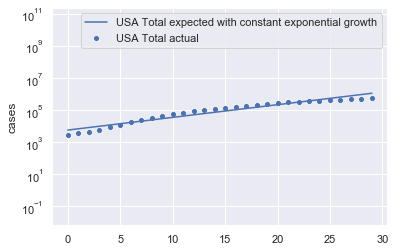

In [14]:
plotFitted(getTotal()["cases"][-30:], "USA Total")

In [15]:
def growthRateAnalysis(series, name, n=30):
    rate, base, n = fitExponential(series[-n:])
    name = f"{name} {series.name}"
    formula = f"{series.name} = {np.round(base, 2)} * exp({np.round(rate, 4)} * day)"
    dailyGrowth = np.round(100 * (np.exp(rate) - 1), 2)
    daysToDoubling = np.round(np.log(2)/rate, 2)
    print(f"{name} exponential formula fitted with {n} points:")
    print(formula)
    print(f"fitted daily growth rate: {dailyGrowth} %, fitted days to doubling: {daysToDoubling}")
    deltas = series.diff(1)
    rates = 100*deltas/series
    data = {
        f"{name} day to day growth rate (%)":rates, 
        f"{name} 3 day moving average":rates.rolling(window=3).mean(), 
        f"{name} 5 day moving average":rates.rolling(window=5).mean(), 
    }
    df = pd.DataFrame(data).dropna()[-n:]
    gr = df.tail(1)[f"{name} 5 day moving average"].values[0]
    dailyGrowth = np.round(gr, 2)
    daysToDoubling = np.round(np.log(2)*100/gr, 2)
    print(f"actual daily growth rate: {dailyGrowth} %, actual days to doubling: {daysToDoubling}")    
    sbn.lineplot(data=df)
    plt.show()
    plotFitted(series[-n:], name)


Total USA cases exponential formula fitted with 30 points:
cases = 5767.71 * exp(0.1826 * day)
fitted daily growth rate: 20.03 %, fitted days to doubling: 3.8
actual daily growth rate: 6.45 %, actual days to doubling: 10.74


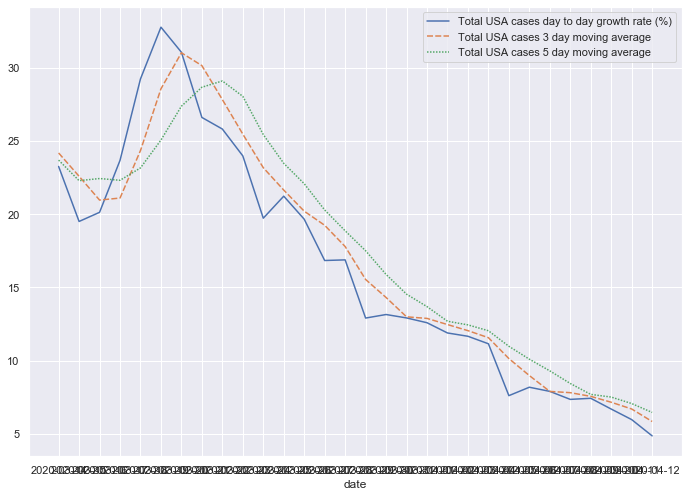

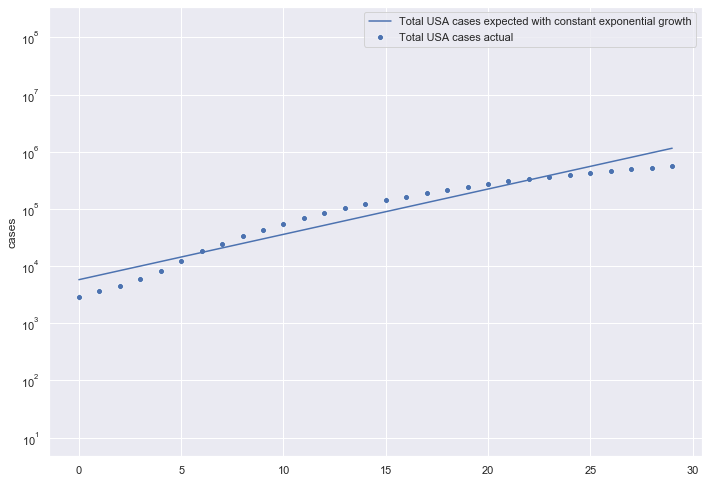

In [16]:
growthRateAnalysis(getTotal()['cases'], "Total USA")

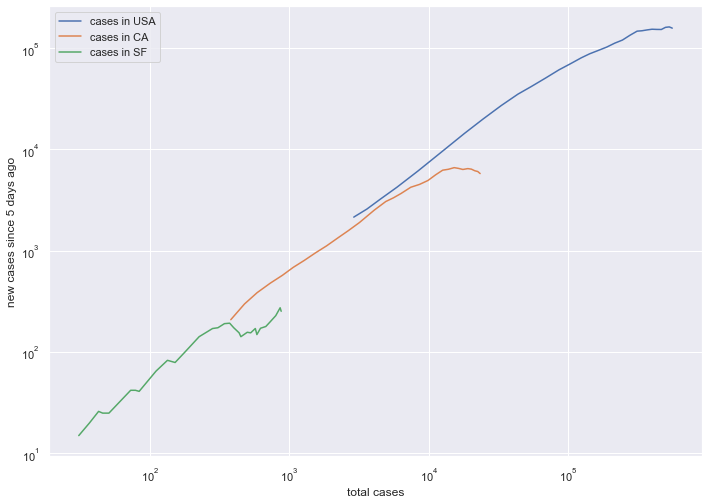

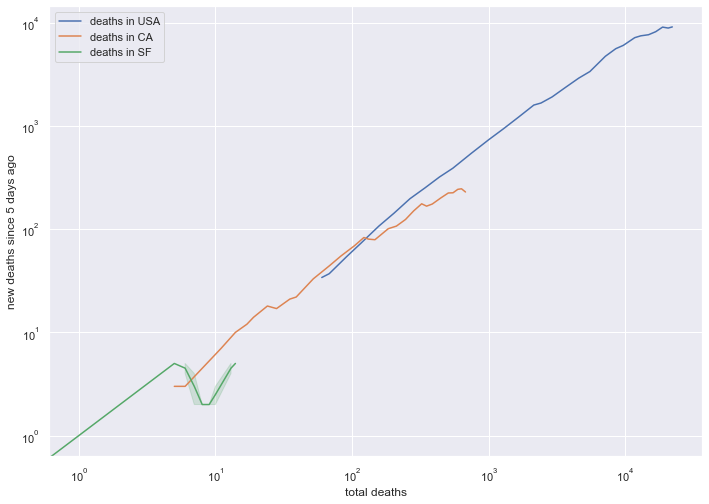

In [17]:
def trajectoryPlot(series, name):
    deltas = series.diff(5)
    fullname = f"{series.name} in {name}"
    x = f"total {series.name}"
    y = f"new {series.name} since 5 days ago"
    data = {x: series, y: deltas}
    plt.loglog()
    df = pd.DataFrame(data).dropna()[-30:]
    sbn.lineplot(x, y, data=df, label=fullname)
    
trajectoryPlot(getTotal()['cases'], "USA")
trajectoryPlot(getState("California")['cases'], "CA")
trajectoryPlot(getCounty("San Francisco")["cases"], "SF")
plt.show()
trajectoryPlot(getTotal()['deaths'], "USA")
trajectoryPlot(getState("California")['deaths'], "CA")
trajectoryPlot(getCounty("San Francisco")["deaths"], "SF")
plt.show()

In [18]:
def laggedPlot(df, name):
    vals = df.copy()
    vals = df.dropna()[df.cases > 0]
    # show correlation with wide range of time lags
    for i in range(30):
        vals[i] = df.cases.shift(i)
    vals = vals.drop(columns='cases')
    vals = vals[vals.deaths > 0][-20:]
    corrs = vals.corr()[['deaths']].drop('deaths')
    lc = np.log(vals).corr()[['deaths']].drop('deaths')
    lc[0] = lc.deaths
    for i in [3, 5, 7]:
        lc[i] = lc.deaths.rolling(i).mean()
    lc = lc.dropna()
    corrdata = {
        f"{name} correlation of log of deaths to log of cases by # of days ago": lc[0],
        f"{name} correlation 3 day moving average": lc[3],
        f"{name} correlation 5 day moving average": lc[5],
        f"{name} correlation 7 day moving average": lc[7],
    }
    corrsdf = pd.DataFrame(corrdata)
    print(f"Correlations for {name}:")
    sbn.lineplot(data=corrsdf)
    plt.show()
    # dig deeper into an interesting set of time lags
    values = vals[["deaths"]].copy()
    ratios = vals[["deaths"]].copy()
    interesting = [7, 14]
    for i in [0, 3, 5, 7]:
        l = lc[i].dropna()
        lmax = l[l==max(l)] # max at this correlation moving average
        interesting += list(lmax.index)
    for i in sorted(list(set(interesting))):
        values[f"{name} cases {i} days ago"] = vals[i]
        ratios[f"{name} deaths/cases {i} days ago"] = vals.deaths/vals[i]
    ratios = ratios.drop(columns=['deaths'])
    print(f"Deaths vs Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=values, dashes=False)
    plt.show()
    print(f"Deaths / Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=ratios, dashes=False)
    plt.show()

    

In [19]:
# laggedPlot(getTotal(), "USA")
# laggedPlot(getState("California"), "CA")
# laggedPlot(getCounty("San Francisco"), "SF")

In [20]:
def analyse(counties=[], states=[], n=20):
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    names = counties + states + ["USA total:"]
    rates= []
    dfs = [getCounty(c) for c in counties] + [getState(s) for s in states] + [getTotal()] 
    print("Trajectory Plots to see if the curve is flattening:")
    for col in ["cases", "deaths"]:
        for df, name in zip(dfs, names):
            trajectoryPlot(df[col], name)
        plt.show()
    for df, name in zip(dfs, names):
        print(f"\n### Analysis for {name:} ###\n")
        growthRateAnalysis(df["cases"], name)
        growthRateAnalysis(df["deaths"], name)
        print(f"Trajectory plots for {name}, to see when the curve starts flattening")
        trajectoryPlot(df.cases, name)
        trajectoryPlot(df.deaths, name)
        plt.show()
        laggedPlot(df, name)


        
    
    

Trajectory Plots to see if the curve is flattening:


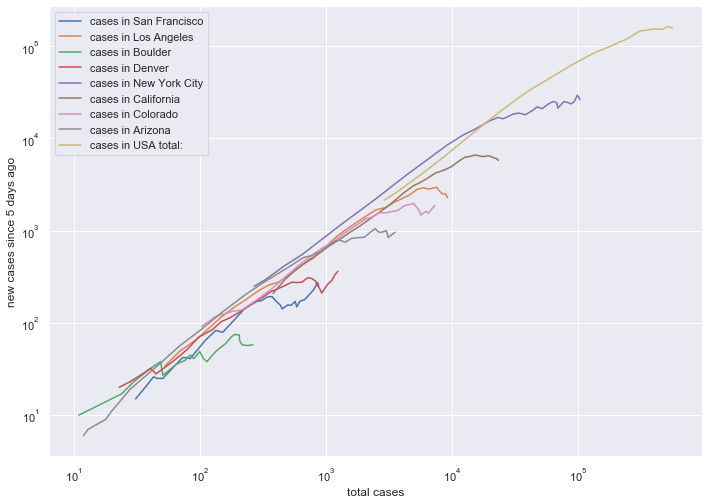

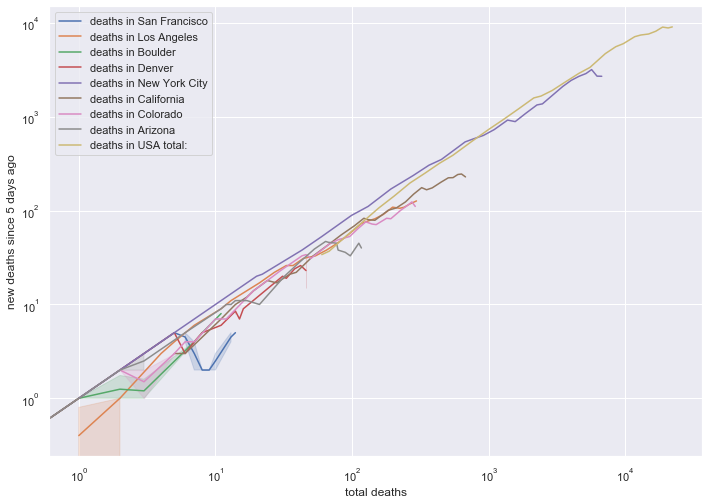


### Analysis for San Francisco ###

San Francisco cases exponential formula fitted with 30 points:
cases = 41.57 * exp(0.1181 * day)
fitted daily growth rate: 12.53 %, fitted days to doubling: 5.87
actual daily growth rate: 6.56 %, actual days to doubling: 10.56


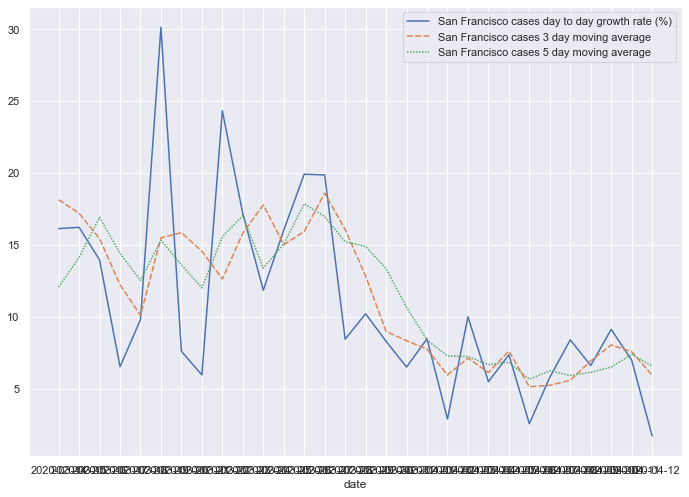

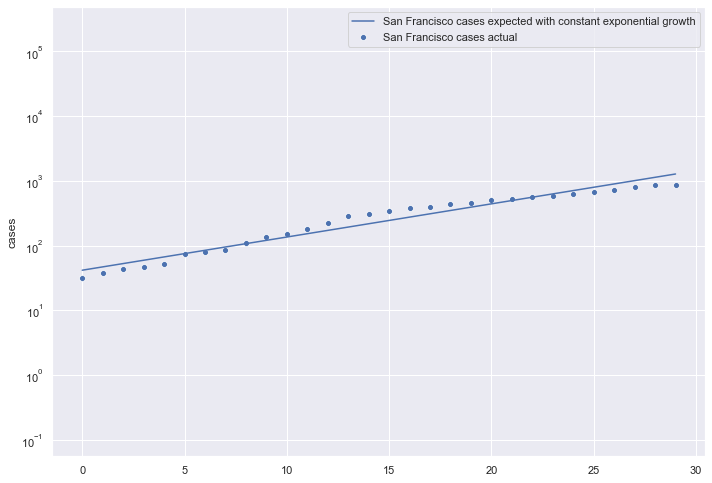

San Francisco deaths exponential formula fitted with 19 points:
deaths = 2.42 * exp(0.1074 * day)
fitted daily growth rate: 11.33 %, fitted days to doubling: 6.46
actual daily growth rate: 8.04 %, actual days to doubling: 8.62


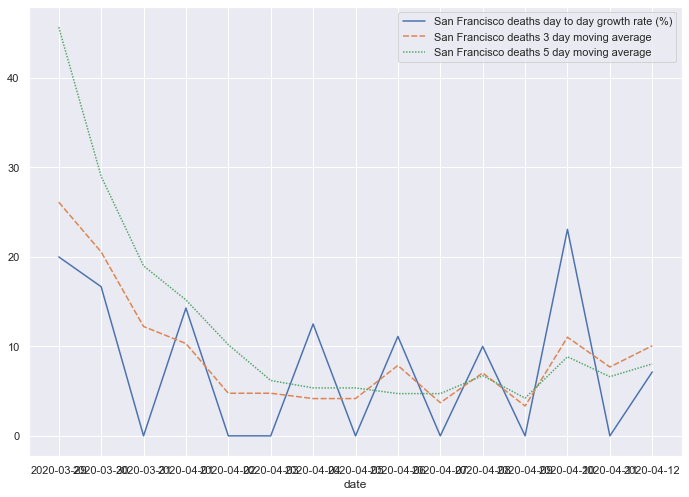

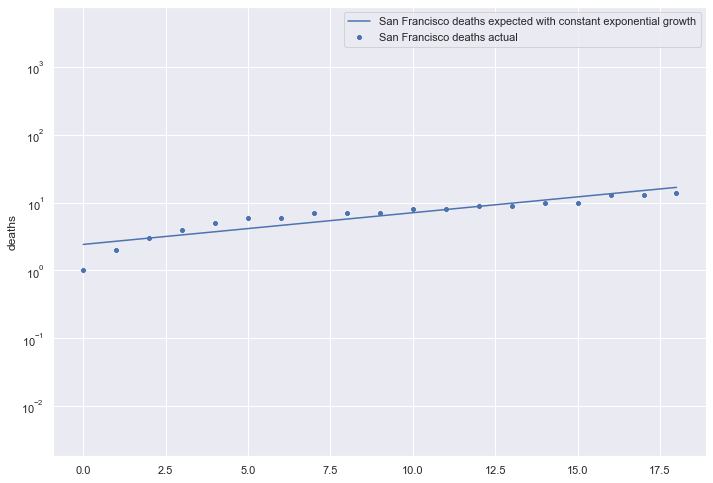

Trajectory plots for San Francisco, to see when the curve starts flattening


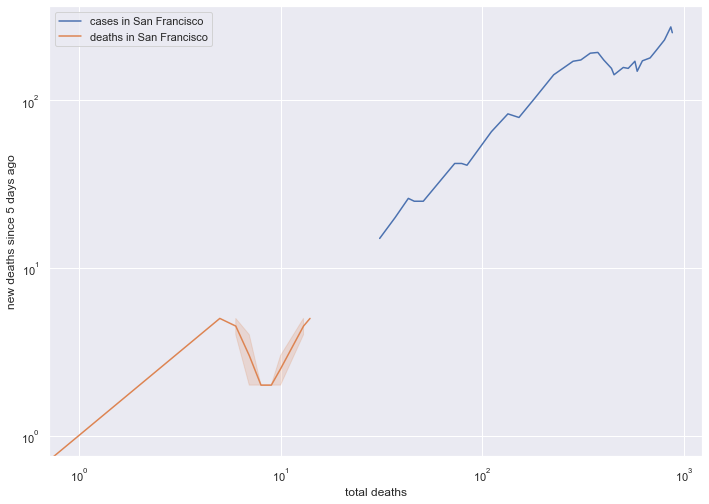

Correlations for San Francisco:


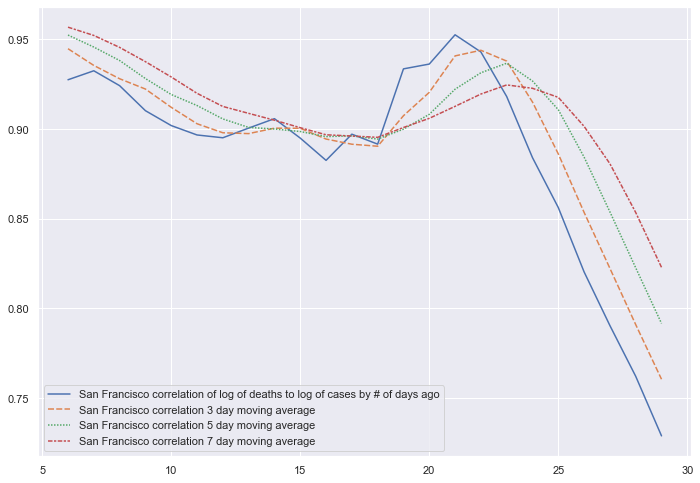

Deaths vs Lagged Values For San Francisco:


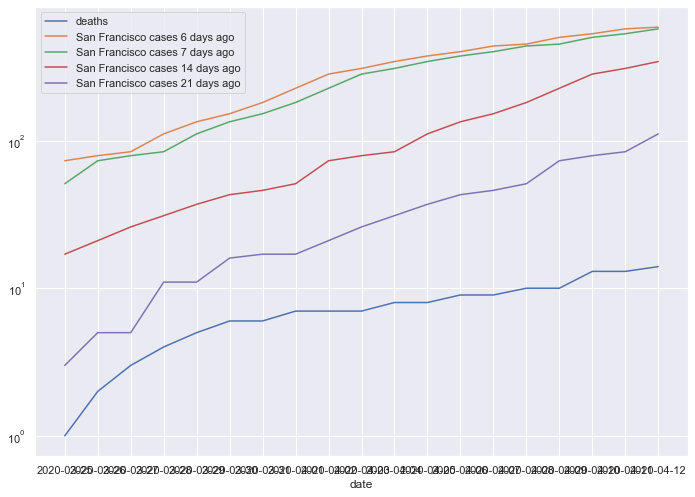

Deaths / Lagged Values For San Francisco:


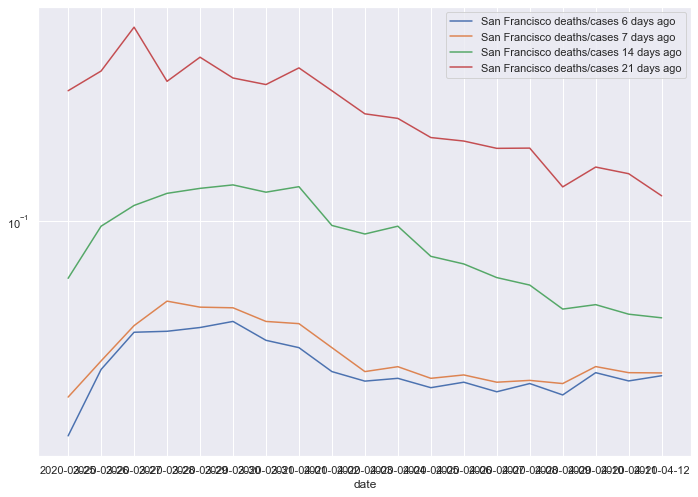


### Analysis for Los Angeles ###

Los Angeles cases exponential formula fitted with 30 points:
cases = 96.98 * exp(0.1805 * day)
fitted daily growth rate: 19.78 %, fitted days to doubling: 3.84
actual daily growth rate: 5.53 %, actual days to doubling: 12.52


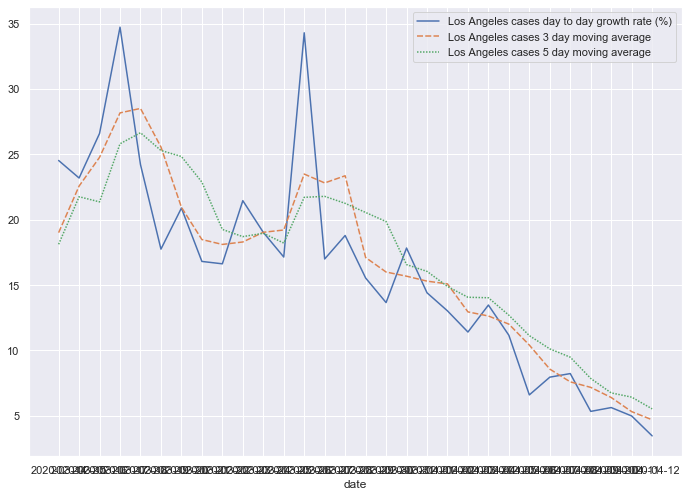

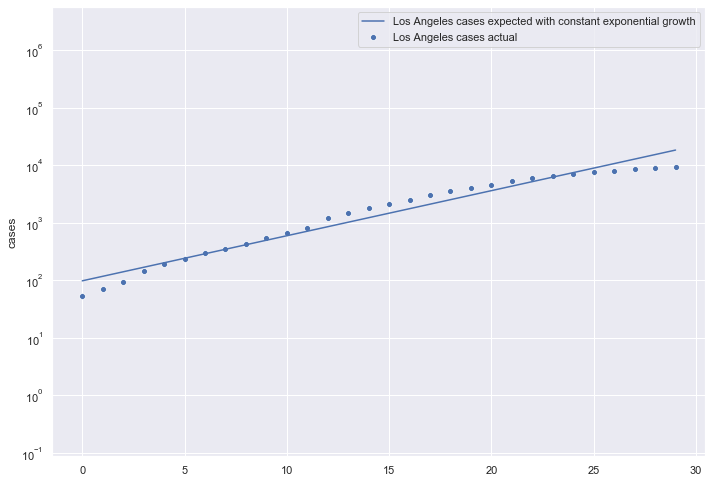

Los Angeles deaths exponential formula fitted with 30 points:
deaths = 0.87 * exp(0.223 * day)
fitted daily growth rate: 24.98 %, fitted days to doubling: 3.11
actual daily growth rate: 10.57 %, actual days to doubling: 6.56


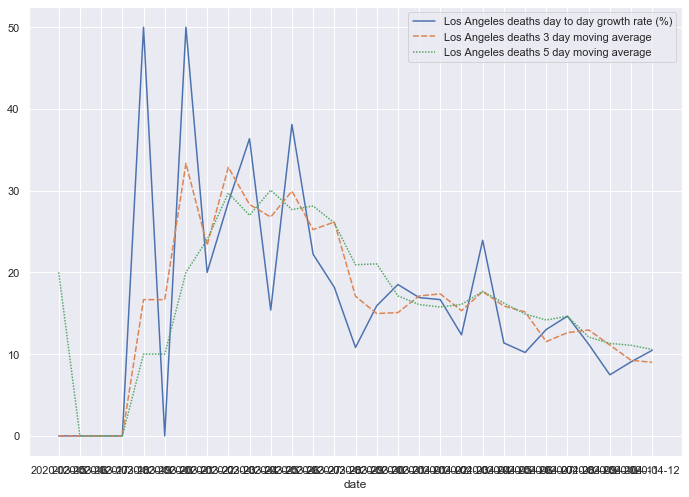

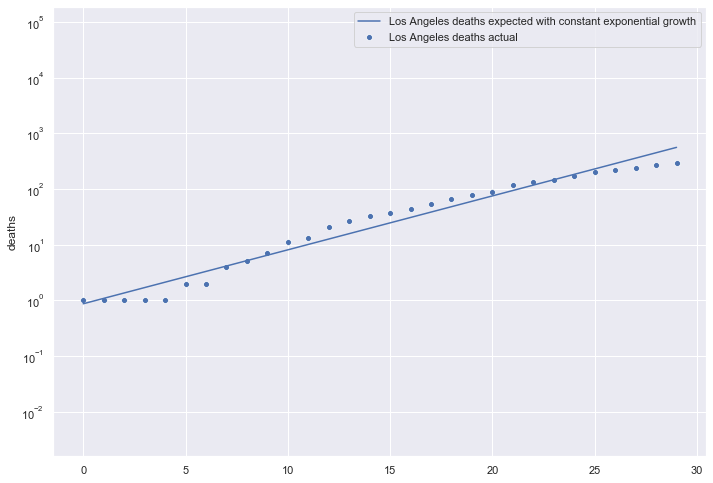

Trajectory plots for Los Angeles, to see when the curve starts flattening


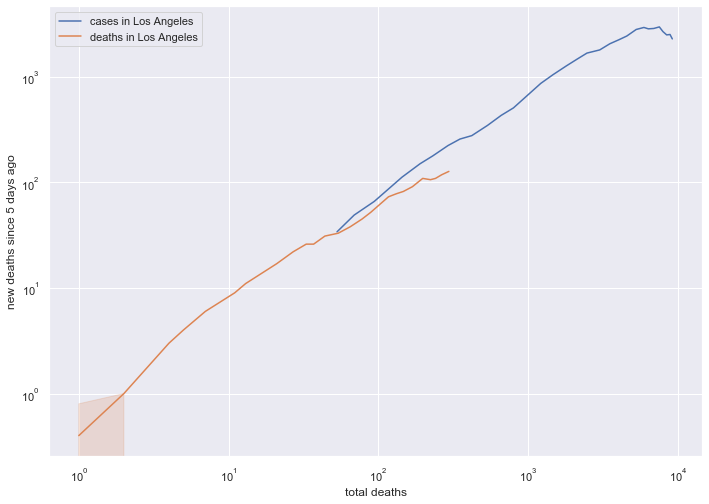

Correlations for Los Angeles:


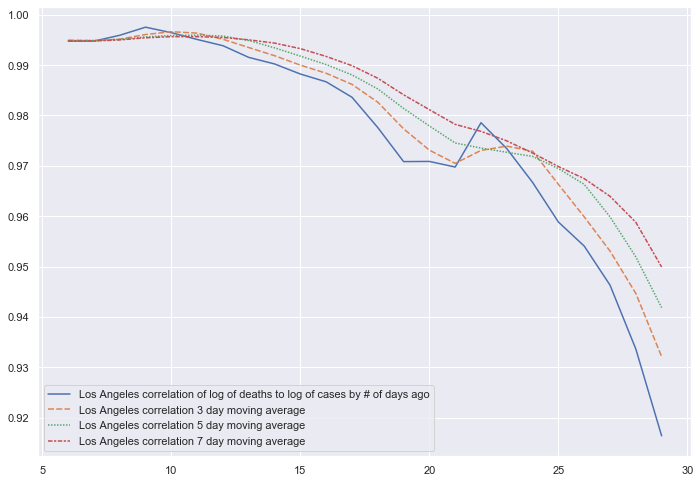

Deaths vs Lagged Values For Los Angeles:


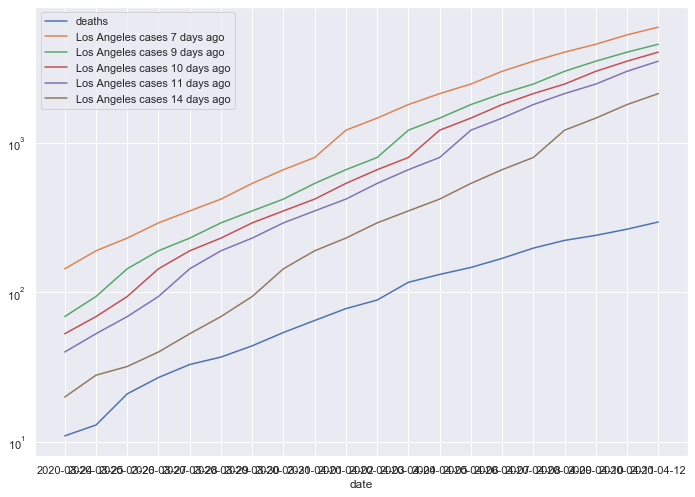

Deaths / Lagged Values For Los Angeles:


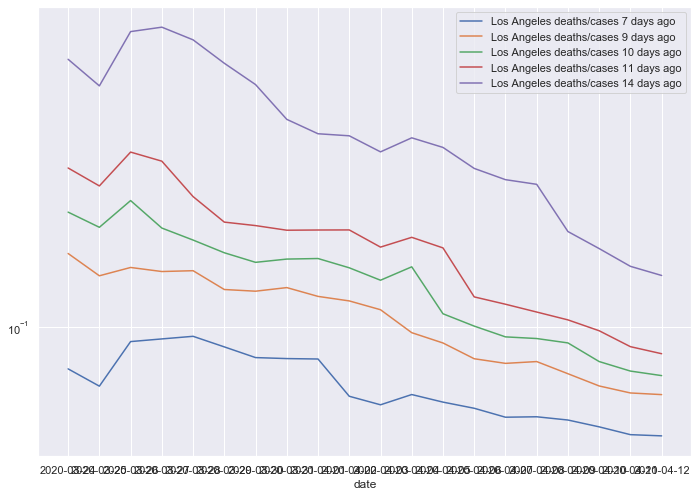


### Analysis for Boulder ###

Boulder cases exponential formula fitted with 30 points:
cases = 6.87 * exp(0.1464 * day)
fitted daily growth rate: 15.77 %, fitted days to doubling: 4.73
actual daily growth rate: 4.81 %, actual days to doubling: 14.41


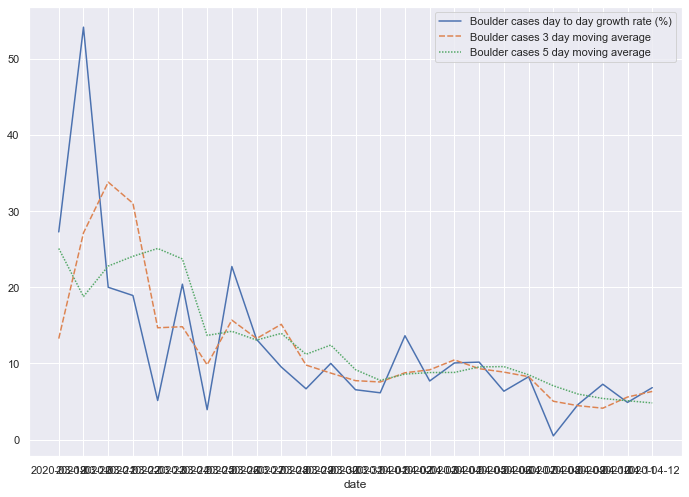

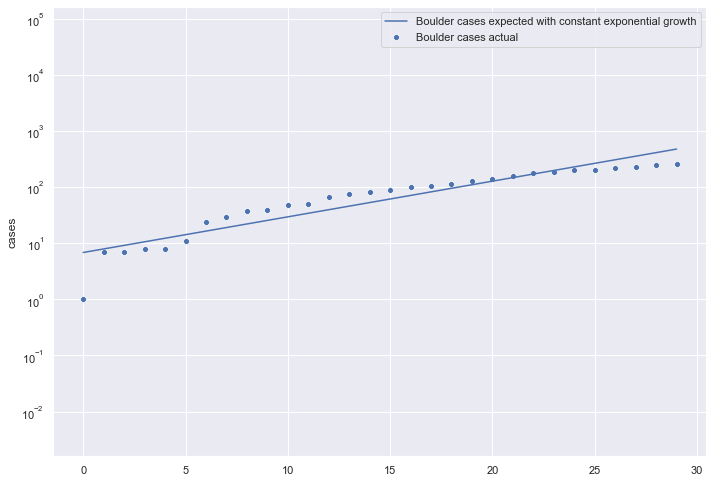

Boulder deaths exponential formula fitted with 17 points:
deaths = 0.83 * exp(0.1451 * day)
fitted daily growth rate: 15.61 %, fitted days to doubling: 4.78
actual daily growth rate: 19.38 %, actual days to doubling: 3.58


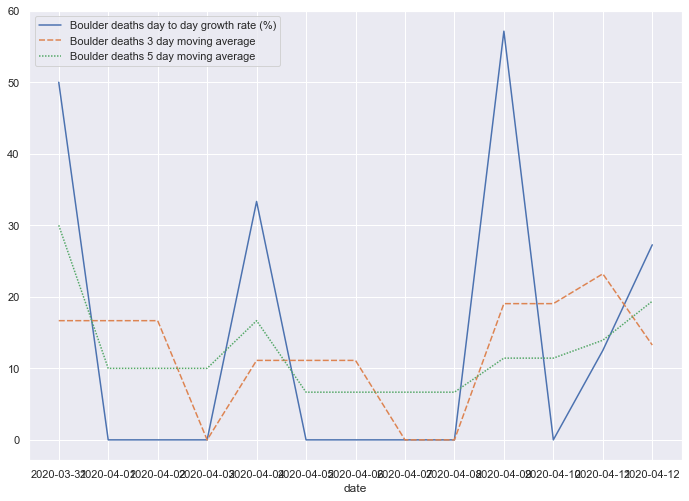

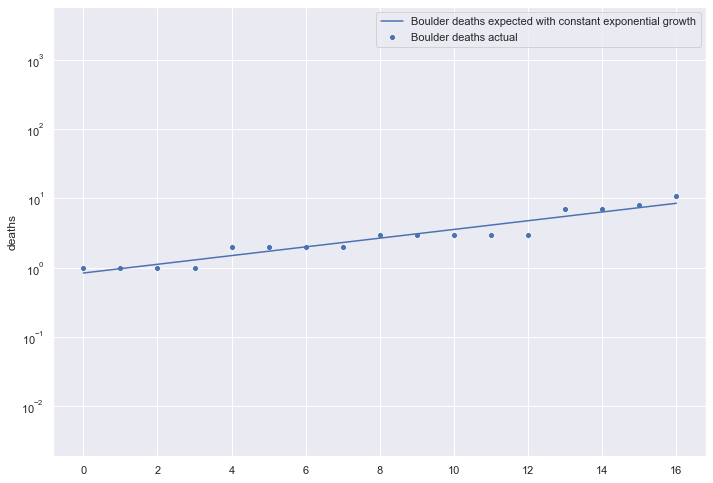

Trajectory plots for Boulder, to see when the curve starts flattening


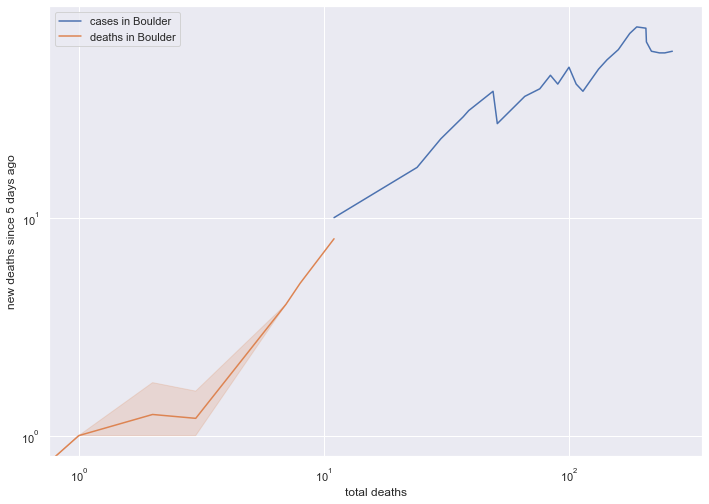

Correlations for Boulder:


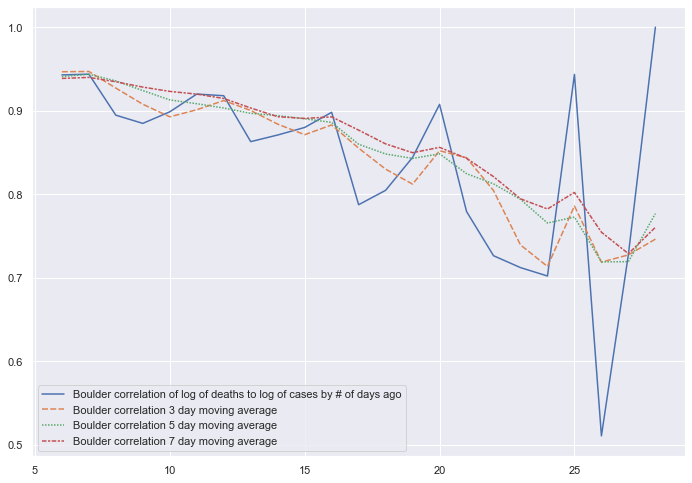

Deaths vs Lagged Values For Boulder:


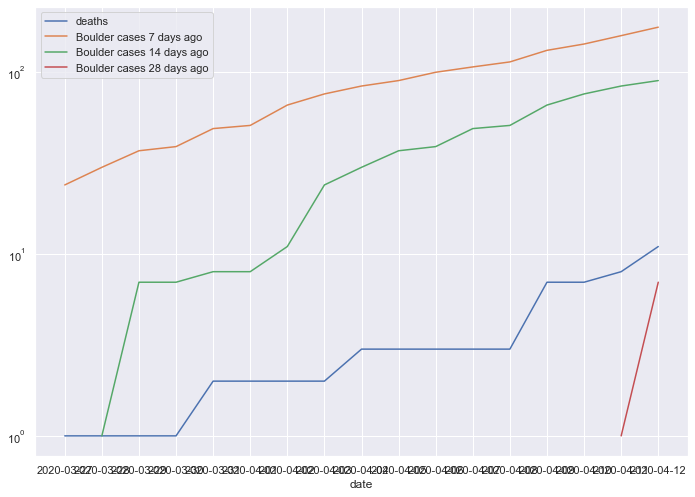

Deaths / Lagged Values For Boulder:


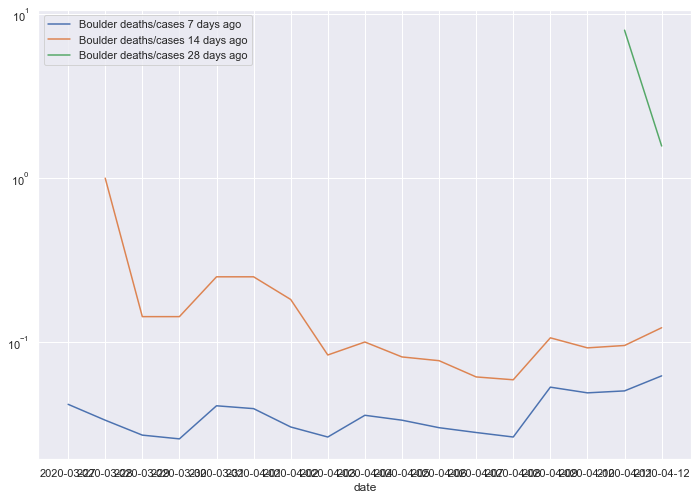


### Analysis for Denver ###

Denver cases exponential formula fitted with 30 points:
cases = 34.6 * exp(0.1411 * day)
fitted daily growth rate: 15.15 %, fitted days to doubling: 4.91
actual daily growth rate: 6.63 %, actual days to doubling: 10.46


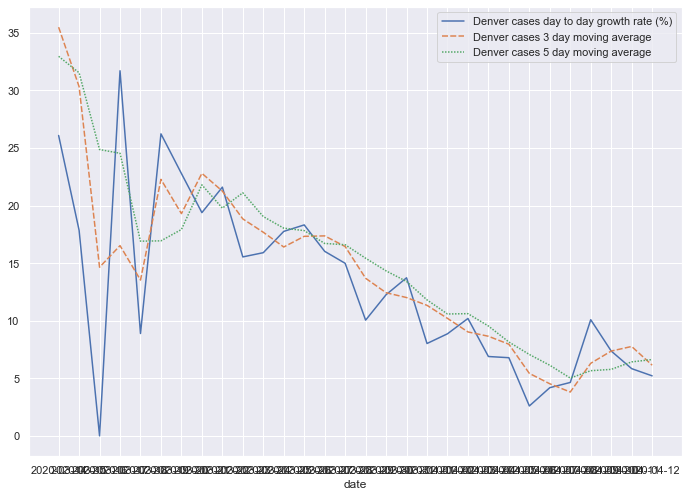

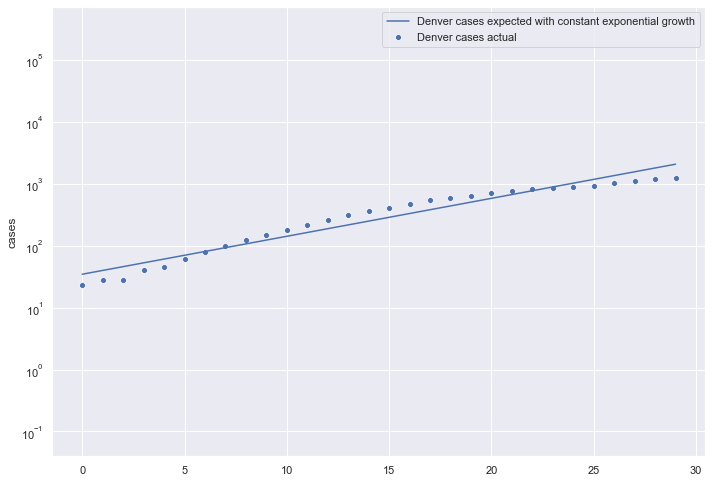

Denver deaths exponential formula fitted with 19 points:
deaths = 2.63 * exp(0.1701 * day)
fitted daily growth rate: 18.55 %, fitted days to doubling: 4.07
actual daily growth rate: 7.49 %, actual days to doubling: 9.26


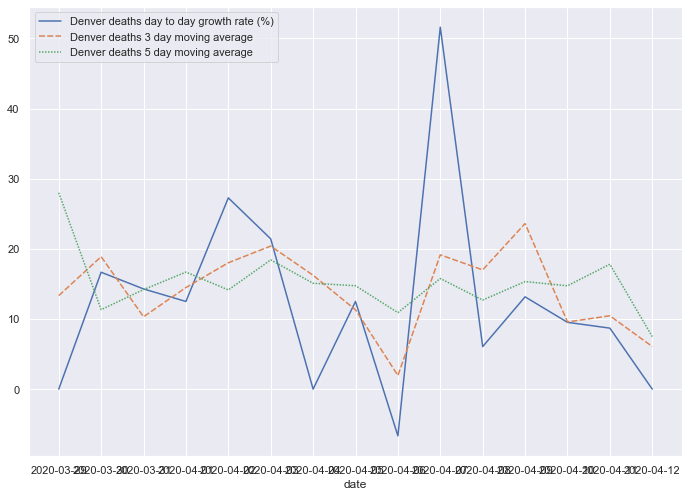

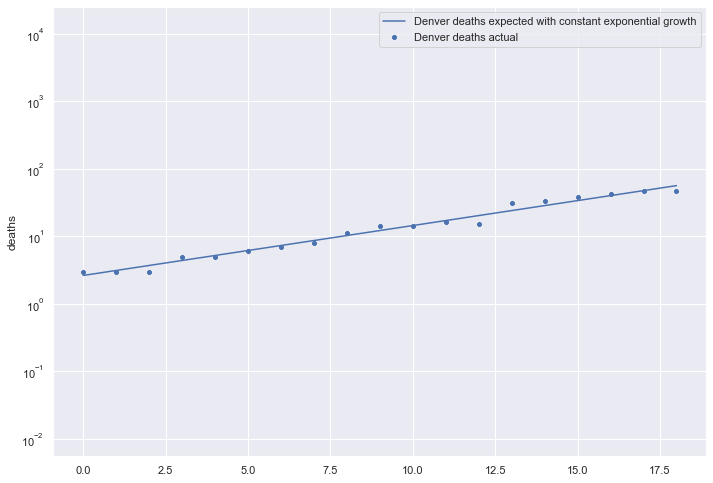

Trajectory plots for Denver, to see when the curve starts flattening


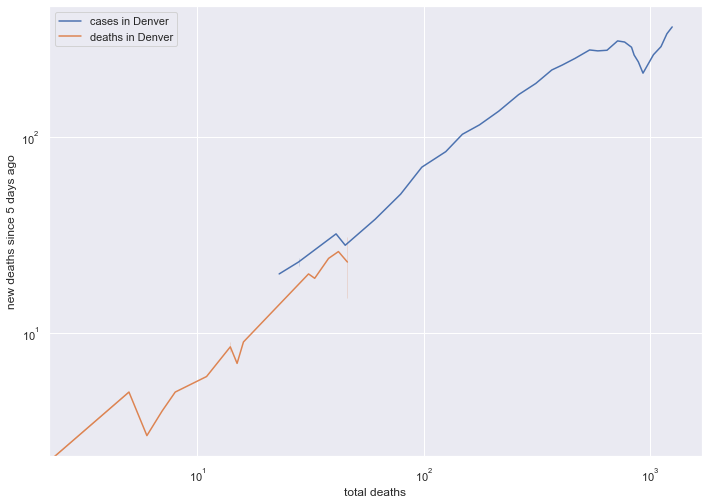

Correlations for Denver:


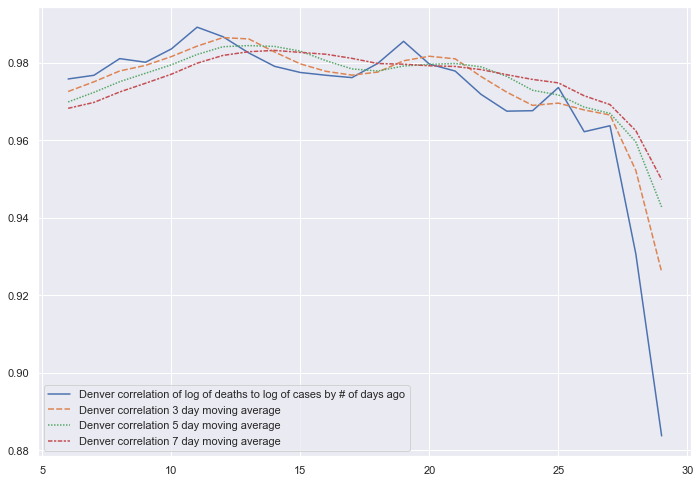

Deaths vs Lagged Values For Denver:


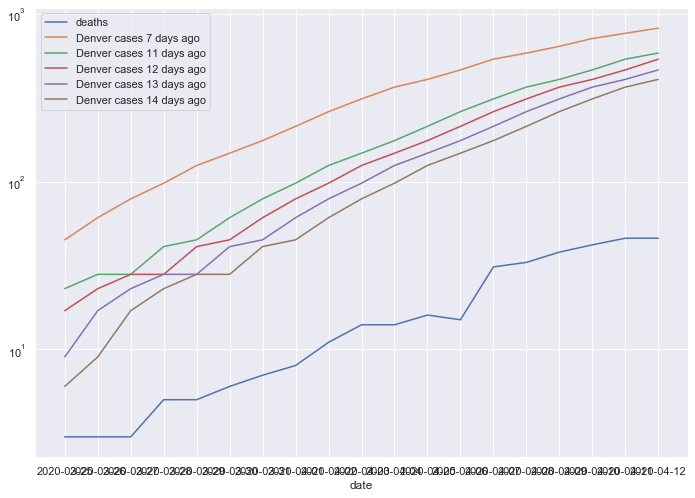

Deaths / Lagged Values For Denver:


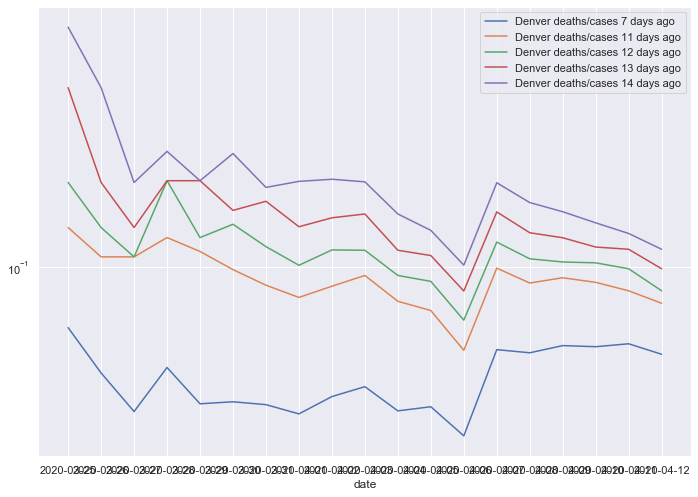


### Analysis for New York City ###

New York City cases exponential formula fitted with 30 points:
cases = 975.87 * exp(0.1935 * day)
fitted daily growth rate: 21.34 %, fitted days to doubling: 3.58
actual daily growth rate: 5.72 %, actual days to doubling: 12.12


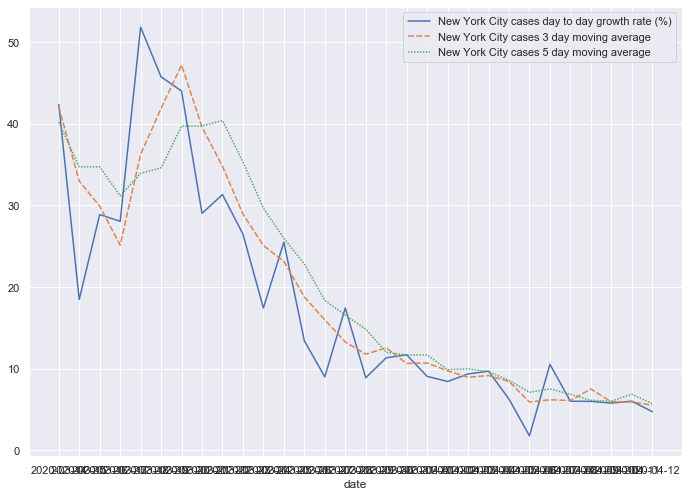

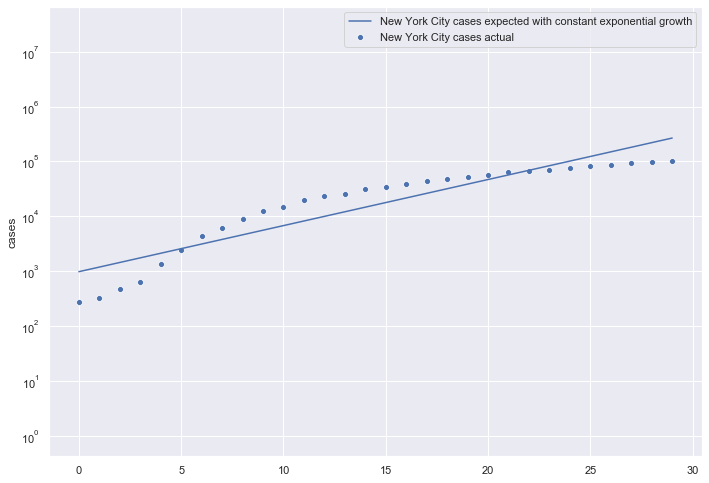

New York City deaths exponential formula fitted with 30 points:
deaths = 7.22 * exp(0.2692 * day)
fitted daily growth rate: 30.89 %, fitted days to doubling: 2.58
actual daily growth rate: 9.79 %, actual days to doubling: 7.08


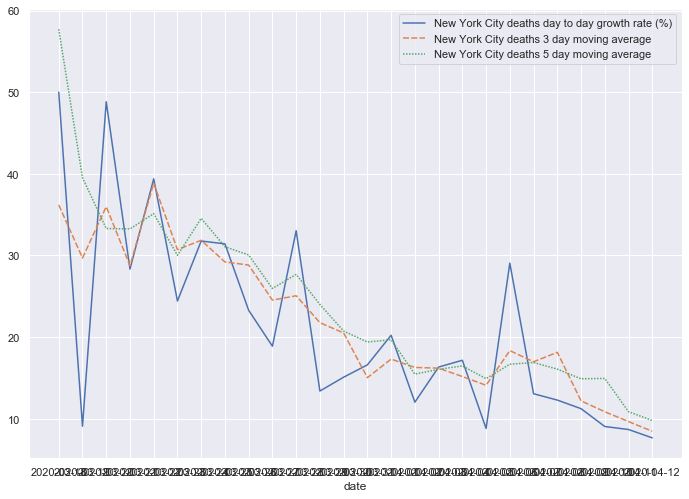

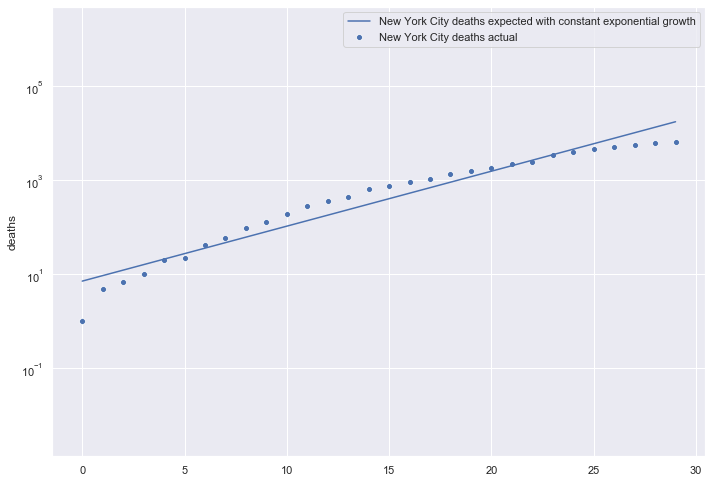

Trajectory plots for New York City, to see when the curve starts flattening


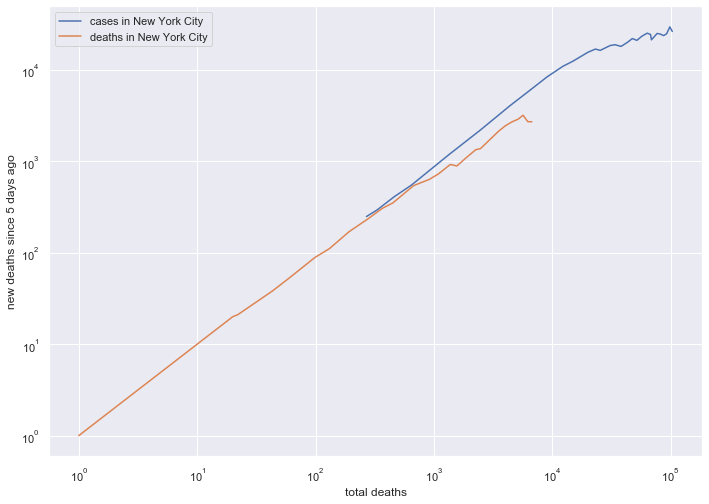

Correlations for New York City:


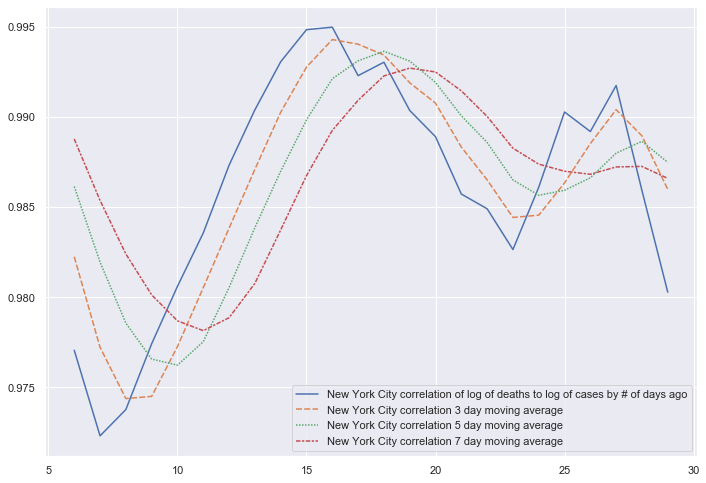

Deaths vs Lagged Values For New York City:


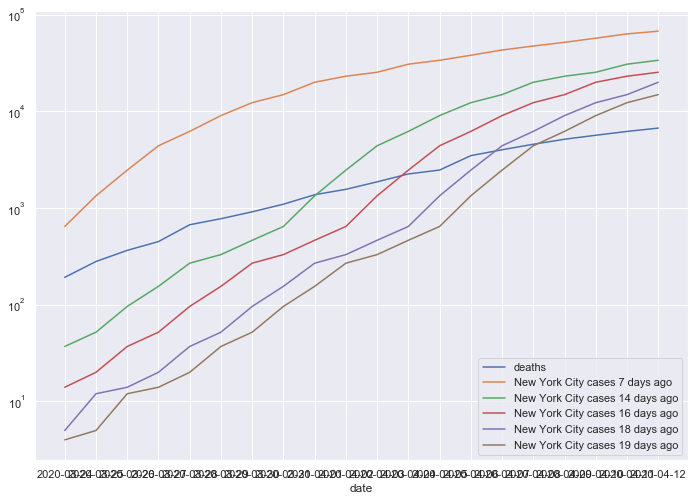

Deaths / Lagged Values For New York City:


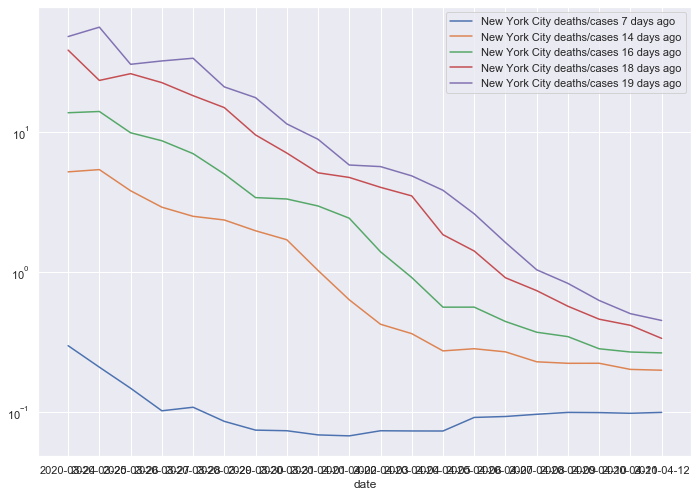


### Analysis for California ###

California cases exponential formula fitted with 30 points:
cases = 556.79 * exp(0.1458 * day)
fitted daily growth rate: 15.7 %, fitted days to doubling: 4.75
actual daily growth rate: 5.53 %, actual days to doubling: 12.53


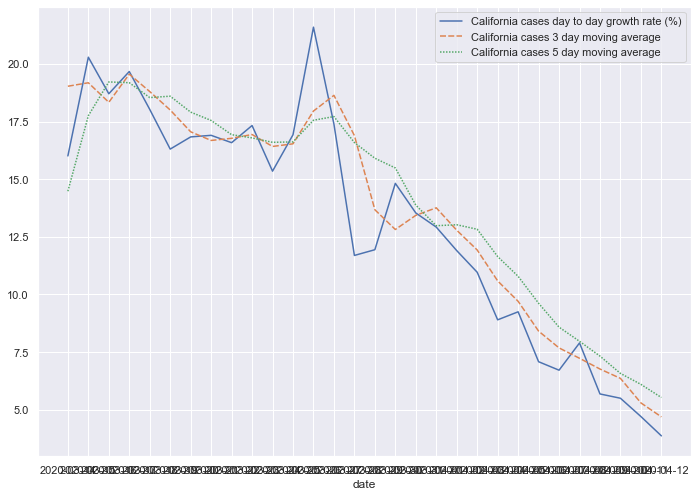

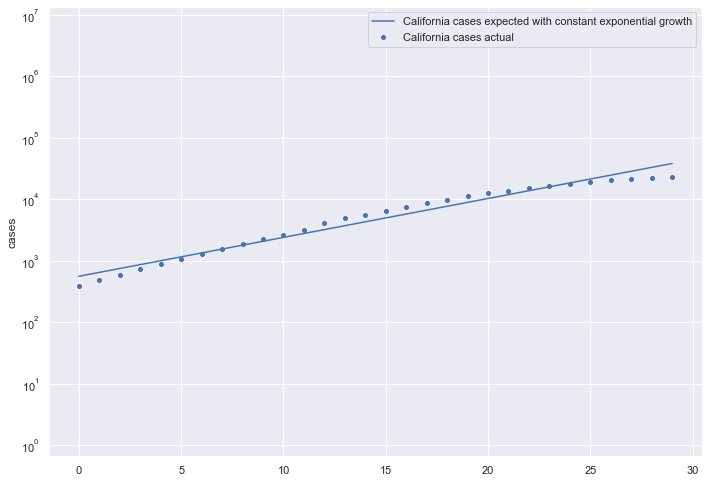

California deaths exponential formula fitted with 30 points:
deaths = 8.71 * exp(0.166 * day)
fitted daily growth rate: 18.06 %, fitted days to doubling: 4.18
actual daily growth rate: 7.92 %, actual days to doubling: 8.75


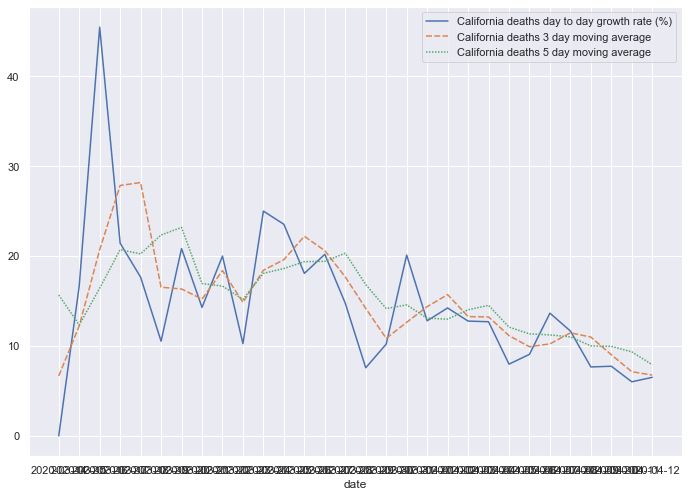

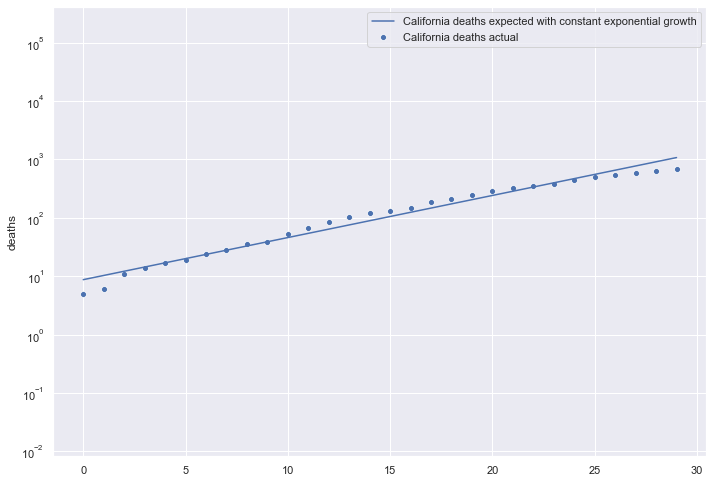

Trajectory plots for California, to see when the curve starts flattening


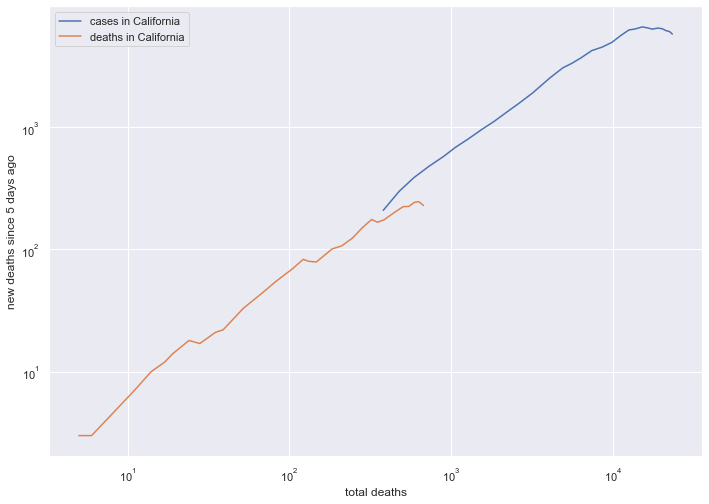

Correlations for California:


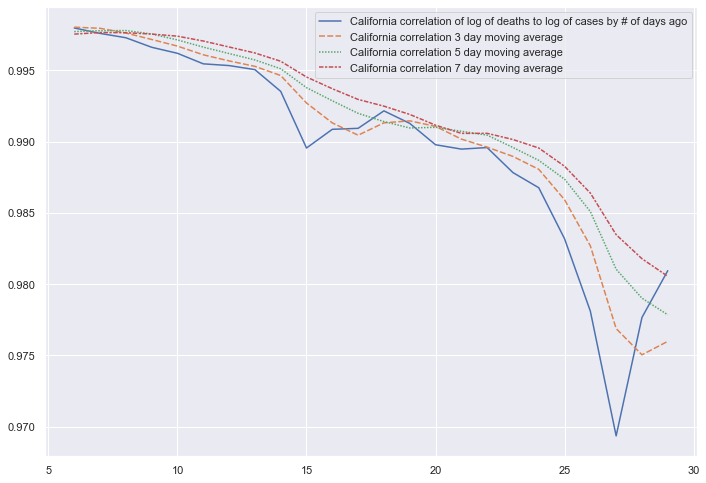

Deaths vs Lagged Values For California:


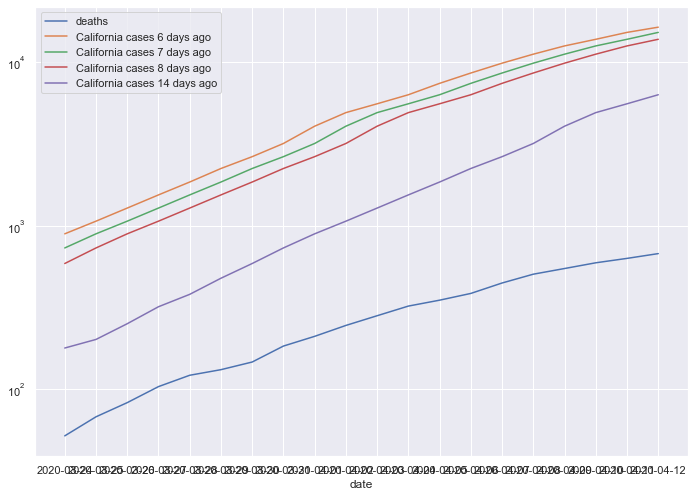

Deaths / Lagged Values For California:


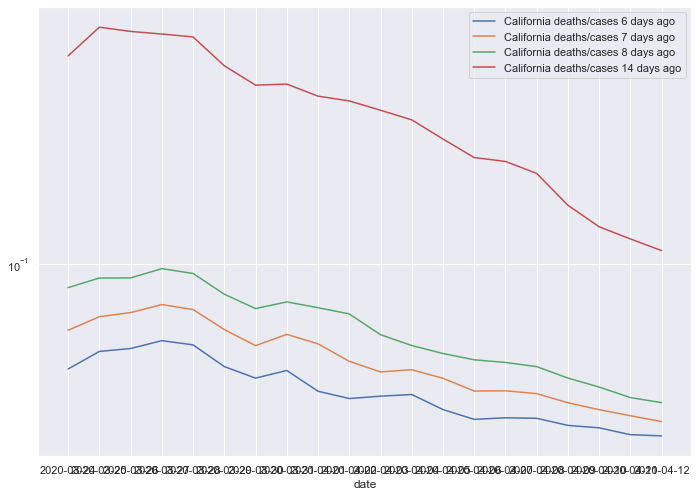


### Analysis for Colorado ###

Colorado cases exponential formula fitted with 30 points:
cases = 161.37 * exp(0.1513 * day)
fitted daily growth rate: 16.33 %, fitted days to doubling: 4.58
actual daily growth rate: 5.74 %, actual days to doubling: 12.07


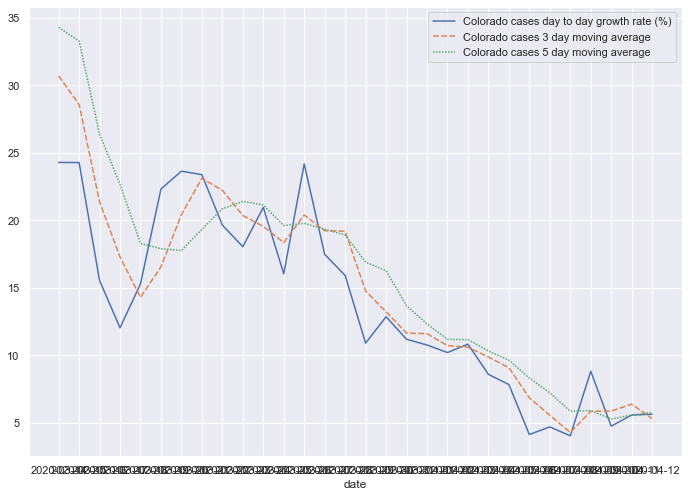

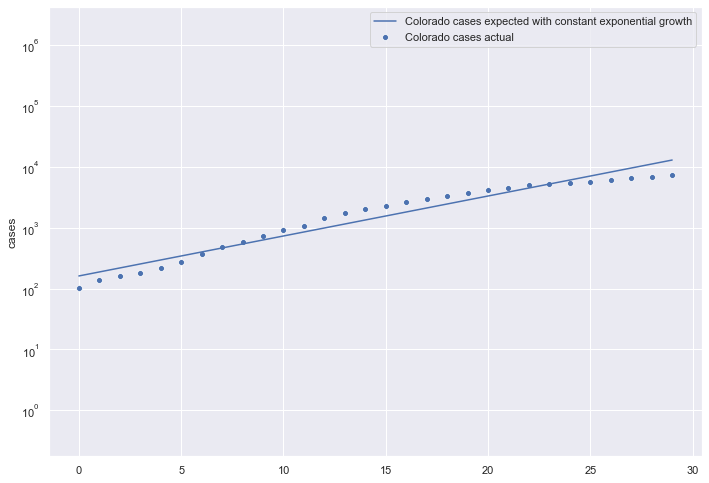

Colorado deaths exponential formula fitted with 30 points:
deaths = 1.91 * exp(0.1908 * day)
fitted daily growth rate: 21.02 %, fitted days to doubling: 3.63
actual daily growth rate: 9.13 %, actual days to doubling: 7.59


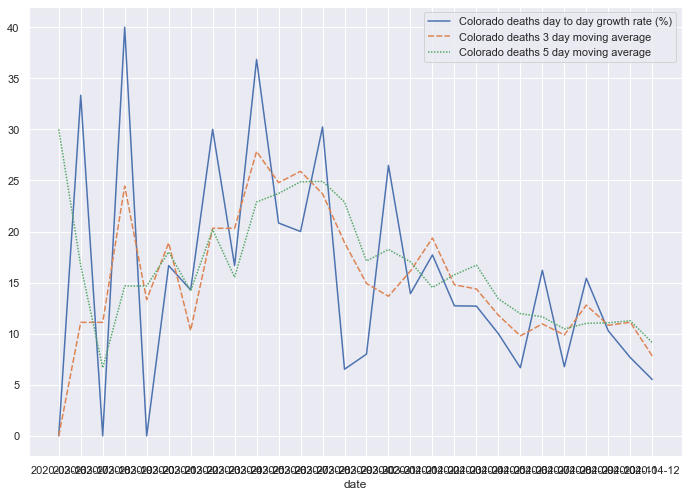

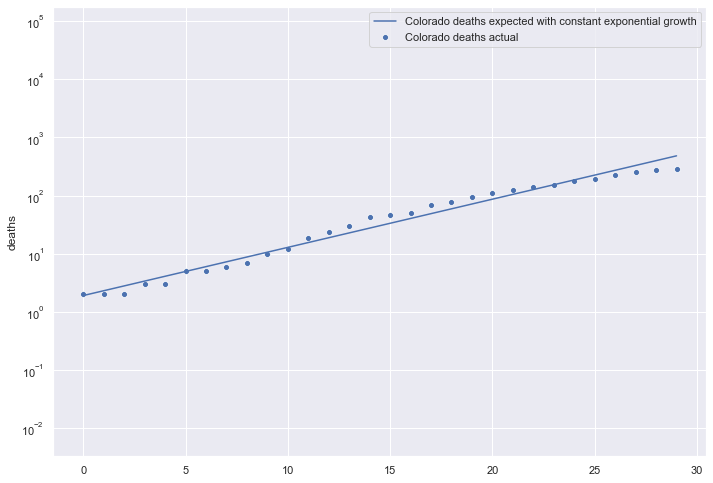

Trajectory plots for Colorado, to see when the curve starts flattening


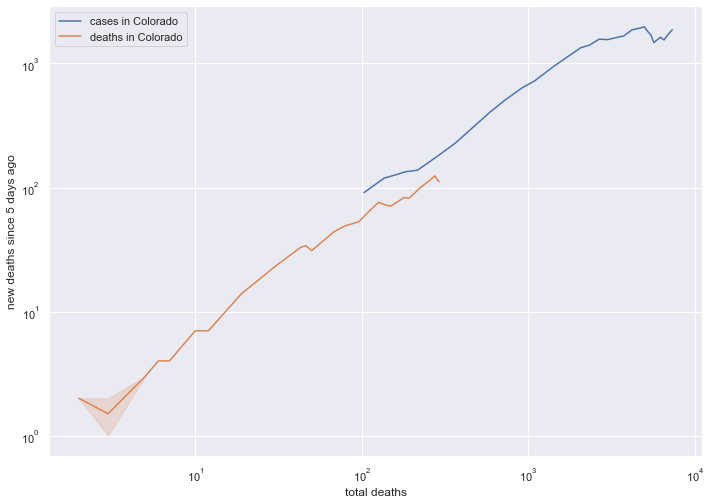

Correlations for Colorado:


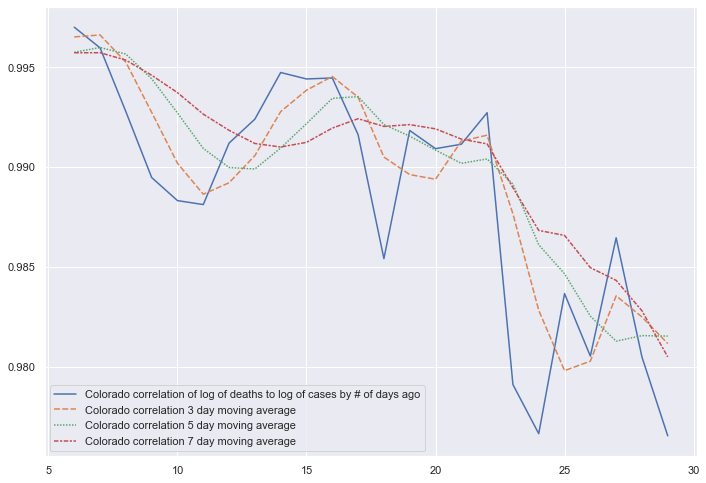

Deaths vs Lagged Values For Colorado:


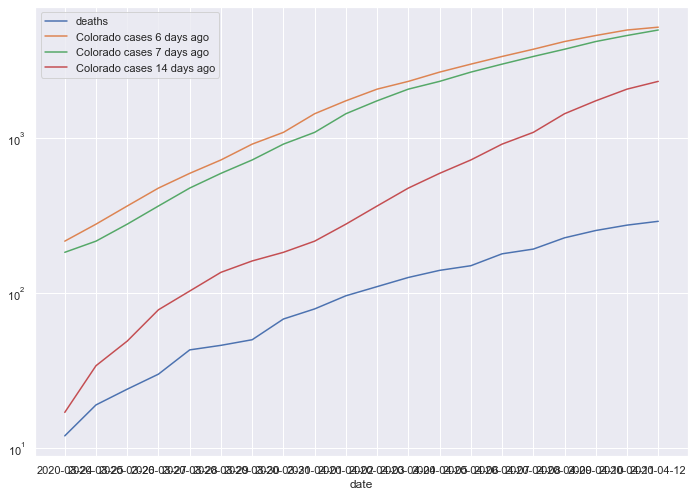

Deaths / Lagged Values For Colorado:


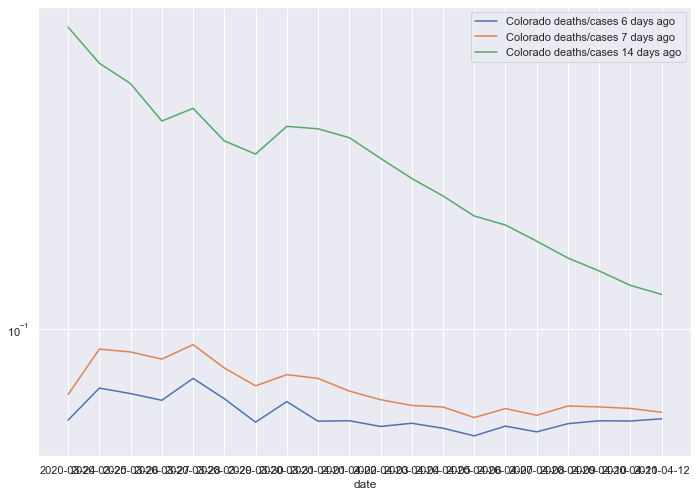


### Analysis for Arizona ###

Arizona cases exponential formula fitted with 30 points:
cases = 22.72 * exp(0.2055 * day)
fitted daily growth rate: 22.82 %, fitted days to doubling: 3.37
actual daily growth rate: 6.11 %, actual days to doubling: 11.34


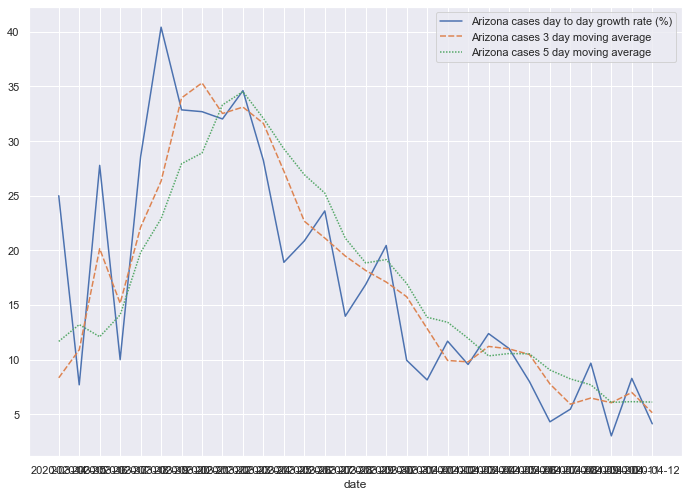

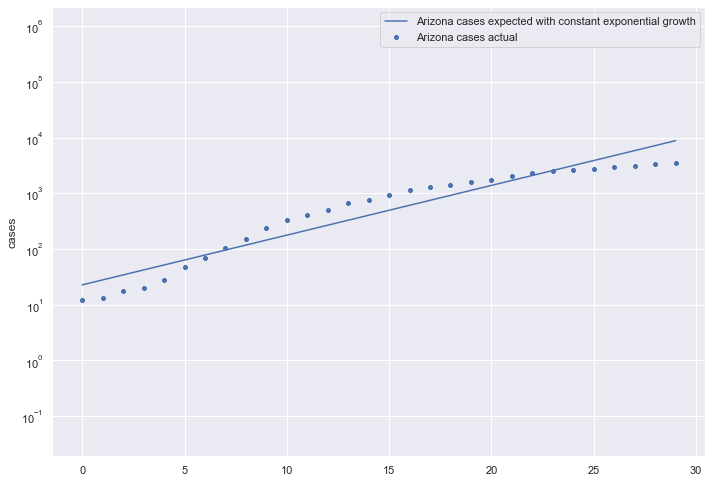

Arizona deaths exponential formula fitted with 24 points:
deaths = 1.41 * exp(0.2171 * day)
fitted daily growth rate: 24.25 %, fitted days to doubling: 3.19
actual daily growth rate: 7.94 %, actual days to doubling: 8.73


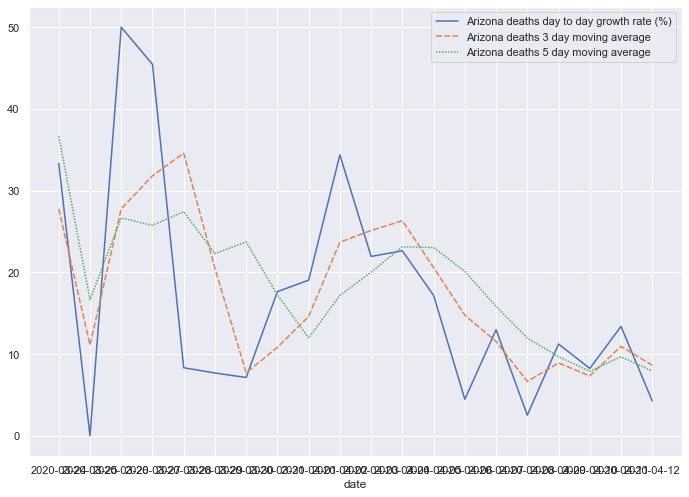

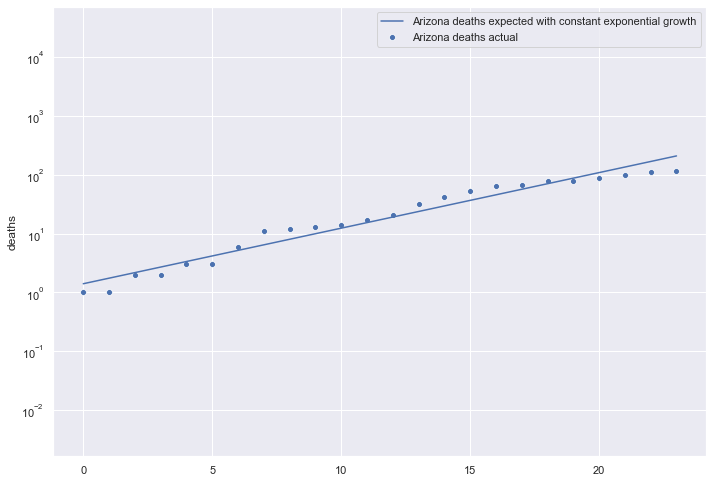

Trajectory plots for Arizona, to see when the curve starts flattening


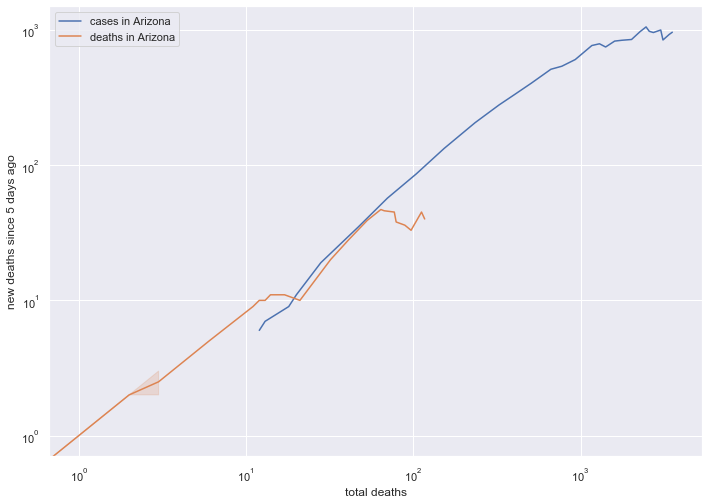

Correlations for Arizona:


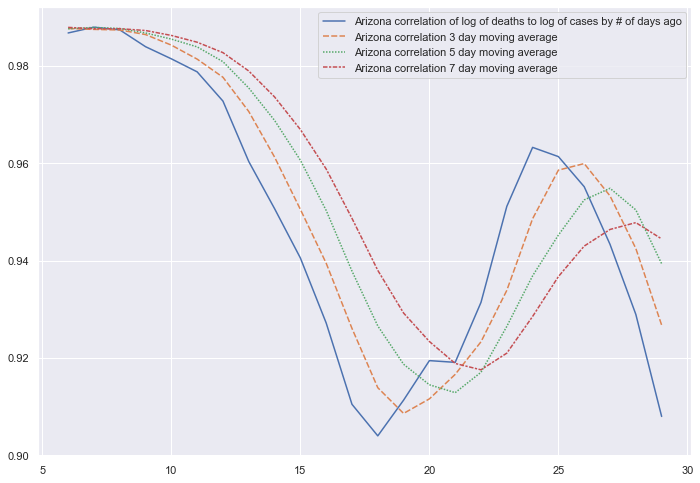

Deaths vs Lagged Values For Arizona:


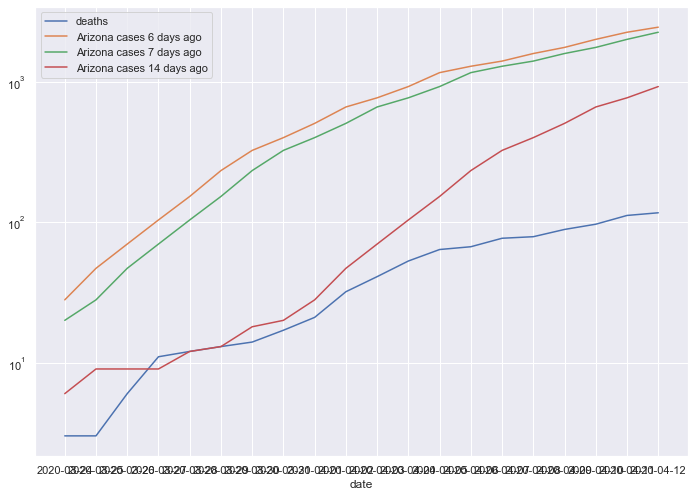

Deaths / Lagged Values For Arizona:


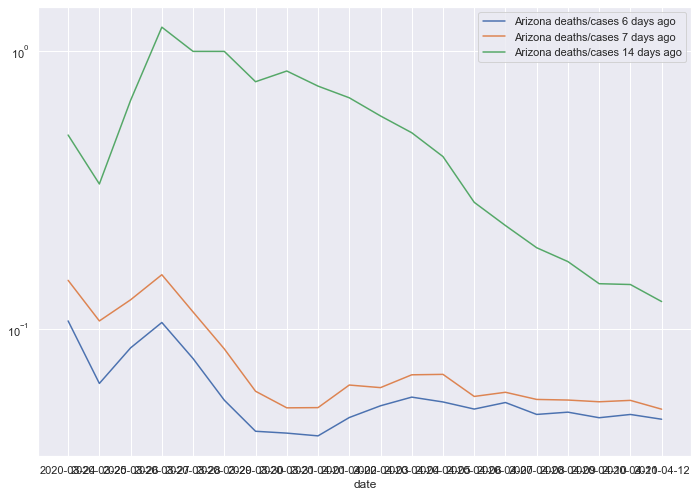


### Analysis for USA total: ###

USA total: cases exponential formula fitted with 30 points:
cases = 5767.71 * exp(0.1826 * day)
fitted daily growth rate: 20.03 %, fitted days to doubling: 3.8
actual daily growth rate: 6.45 %, actual days to doubling: 10.74


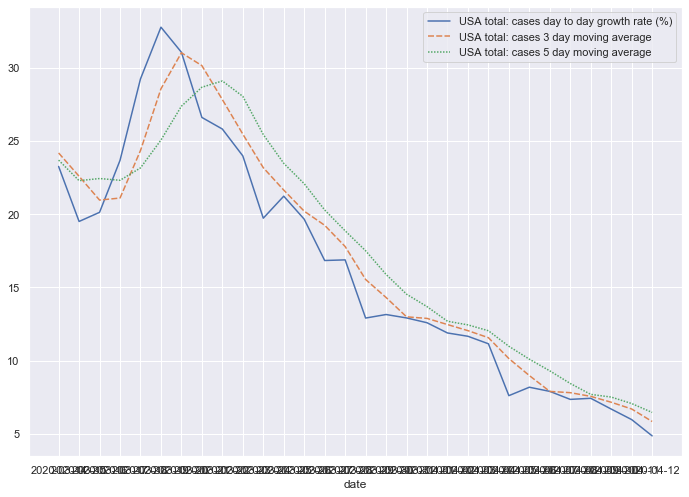

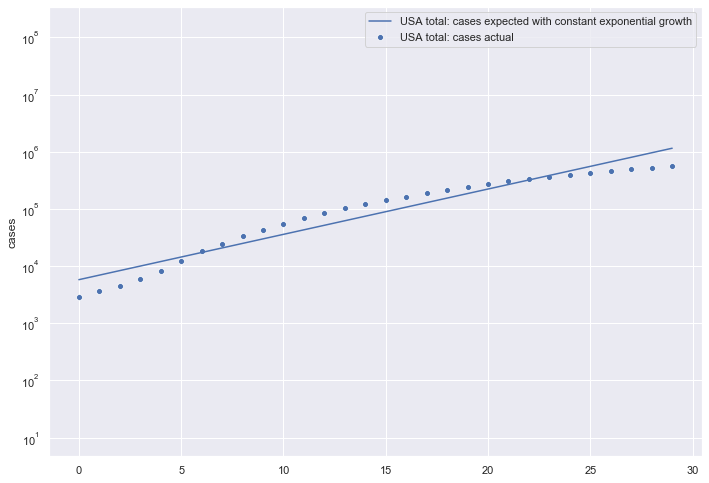

USA total: deaths exponential formula fitted with 30 points:
deaths = 76.7 * exp(0.2145 * day)
fitted daily growth rate: 23.93 %, fitted days to doubling: 3.23
actual daily growth rate: 10.07 %, actual days to doubling: 6.88


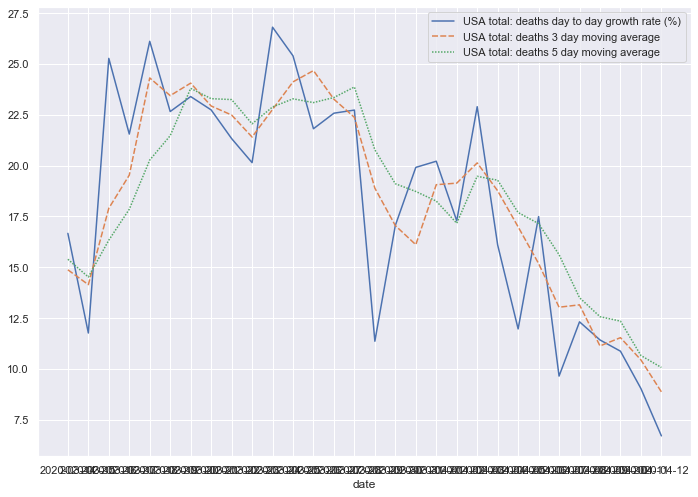

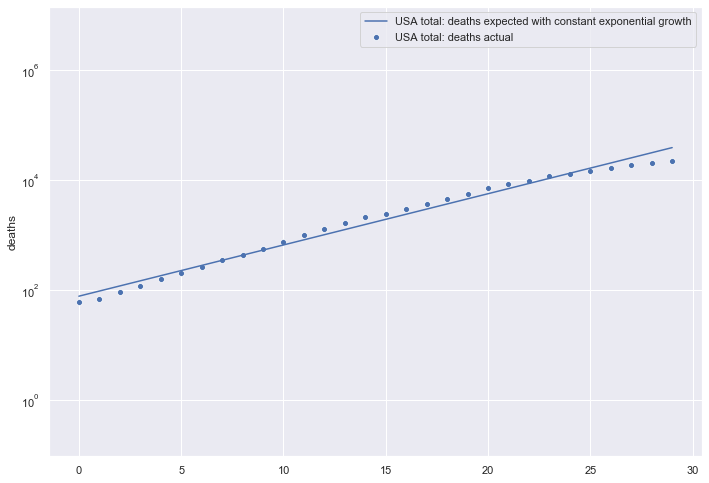

Trajectory plots for USA total:, to see when the curve starts flattening


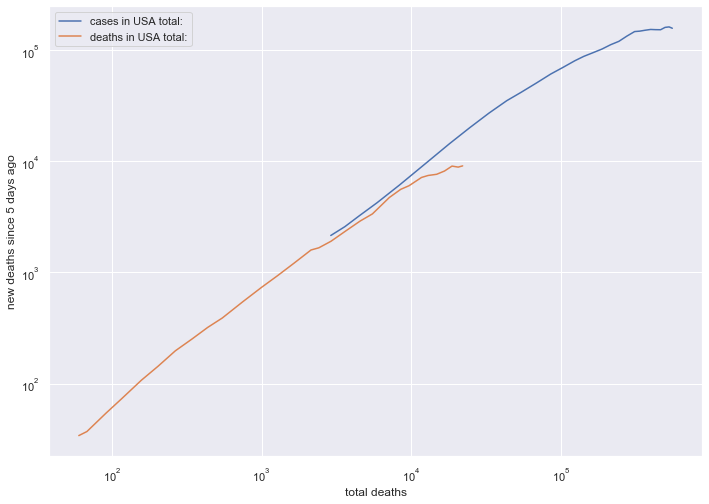

Correlations for USA total::


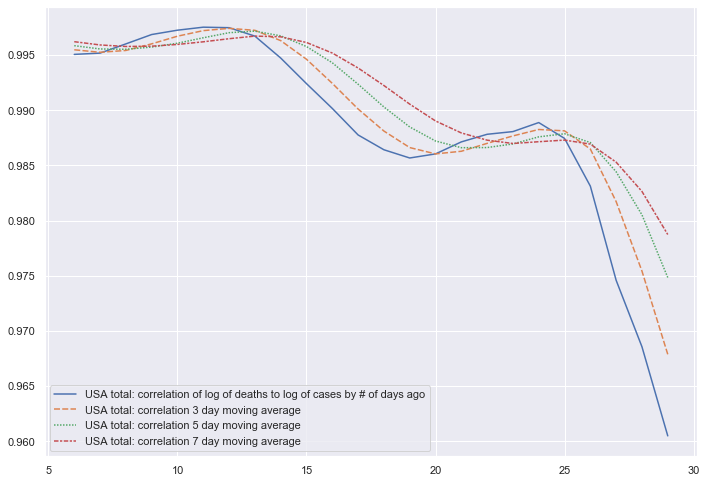

Deaths vs Lagged Values For USA total::


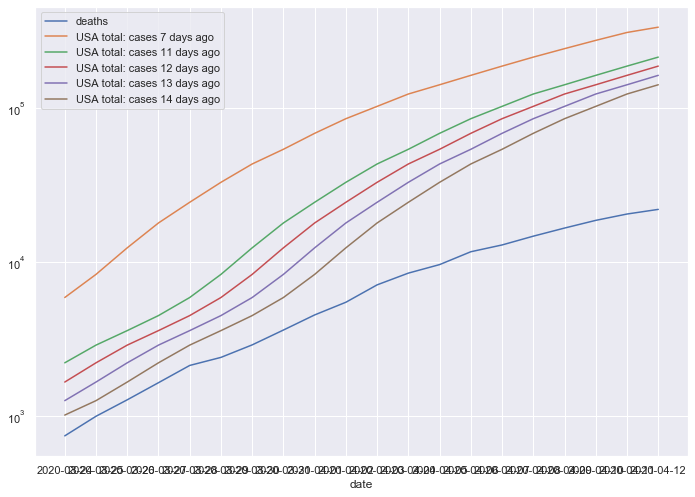

Deaths / Lagged Values For USA total::


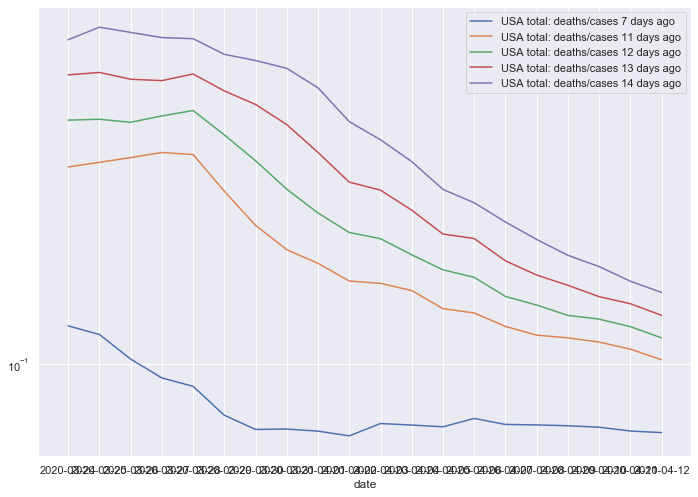

In [21]:
counties =["San Francisco", "Los Angeles", "Boulder", "Denver", "New York City"]
states = [ "California", "Colorado", "Arizona"]
analyse(counties=counties, states=states)